# **PRODIGY_DS_04 BY HARSH THAKKAR**
# **Task-4: Analyzing and visualizing sentiment patterns in Social Media Data (Twitter).**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk.data
import re
from collections import Counter
from string import punctuation
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score , f1_score, accuracy_score

In [3]:
from gensim.models import Word2Vec
!pip install torch
!pip install torchmetrics
!pip install mlxtend
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import DataLoader , TensorDataset
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

lemma = WordNetLemmatizer()
lb = LabelEncoder()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.1/806.1 kB 5.4 MB/s eta 0:00:00


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Loading dataset
twitter = pd.read_csv('/content/drive/MyDrive/Prodigy Infotech Data Science Internship/Task-4/twitter_training.csv')

In [6]:
twitter

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [7]:
twitter.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [8]:
twitter.tail()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...
74680,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [9]:
#check for unique values
np.unique(twitter['Borderlands'])

array(['Amazon', 'ApexLegends', 'AssassinsCreed', 'Battlefield',
       'Borderlands', 'CS-GO', 'CallOfDuty', 'CallOfDutyBlackopsColdWar',
       'Cyberpunk2077', 'Dota2', 'FIFA', 'Facebook', 'Fortnite', 'Google',
       'GrandTheftAuto(GTA)', 'Hearthstone', 'HomeDepot',
       'LeagueOfLegends', 'MaddenNFL', 'Microsoft', 'NBA2K', 'Nvidia',
       'Overwatch', 'PlayStation5(PS5)',
       'PlayerUnknownsBattlegrounds(PUBG)', 'RedDeadRedemption(RDR)',
       'TomClancysGhostRecon', 'TomClancysRainbowSix', 'Verizon',
       'WorldOfCraft', 'Xbox(Xseries)', 'johnson&johnson'], dtype=object)

In [10]:
np.unique(twitter['Positive'])

array(['Irrelevant', 'Negative', 'Neutral', 'Positive'], dtype=object)

In [11]:
#dropping unique values
twitter = twitter.drop('2401',axis=1)

In [12]:
#Rename feature columns
twitter = twitter.rename(columns={"Borderlands": "F2", "im getting on borderlands and i will murder you all ,": "F1", "Positive": "Review"})

In [13]:
twitter.head()

,F2,Review,F1
0,Borderlands,Positive,I am coming to the borders and I will kill you...
1,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,Borderlands,Positive,im coming on borderlands and i will murder you...
3,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,Borderlands,Positive,im getting into borderlands and i can murder y...


In [14]:
twitter["tweets"] = twitter["F1"].astype(str) + " " + twitter["F2"].astype(str)
twitter = twitter.drop(["F1","F2"], axis=1)

In [15]:
twitter_review = {key : value for value , key in enumerate(np.unique(twitter['Review']))}
twitter_review

{'Irrelevant': 0, 'Negative': 1, 'Neutral': 2, 'Positive': 3}

In [16]:
def getlabel(n) :
    for x , y in twitter_Review.items() :
        if y==n :
            return x

object
['Positive' 'Neutral' 'Negative' 'Irrelevant']


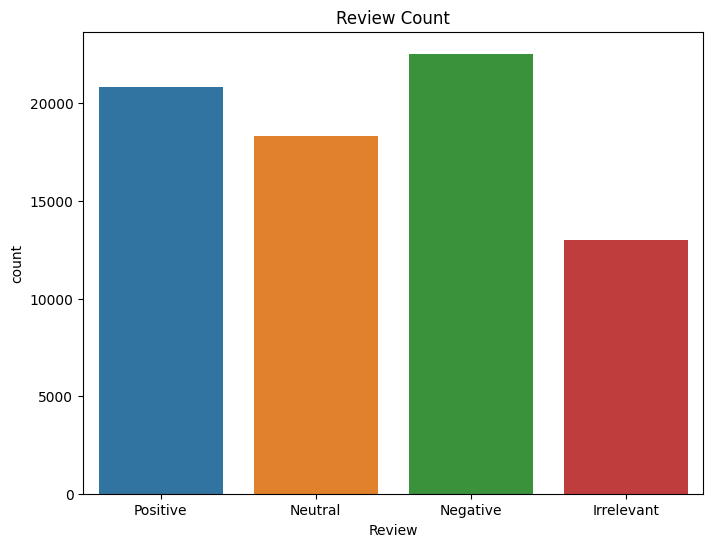

In [17]:
# EDA
# Check data types and unique values
print(twitter['Review'].dtype)
print(twitter['Review'].unique())

# Create a count plot
plt.figure(figsize=(8, 6))
sns.countplot(data=twitter, x='Review')
plt.title('Review Count')
plt.xlabel('Review')
plt.show()

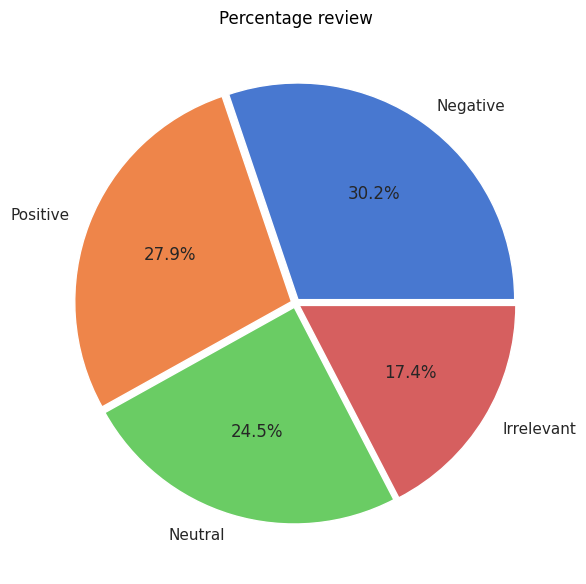

In [18]:
review_count = twitter['Review'].value_counts()
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

sns.set_theme(style='ticks', palette='muted')
color = sns.color_palette(palette='muted')
explode = [0.02] * len(review_count)

axes.pie(review_count.values, labels=review_count.index, autopct='%1.1f%%', colors=color, explode=explode)
axes.set_title('Percentage review')

plt.tight_layout()
plt.show()

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

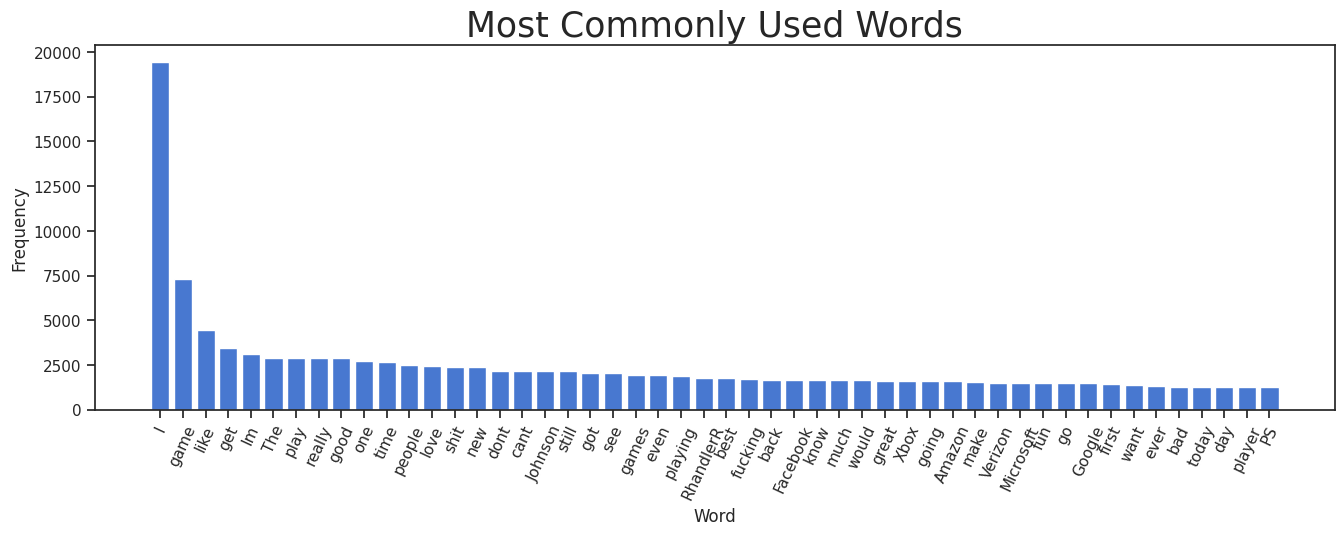

In [20]:
def Most_Words_used(tweets, num_of_words):
    all_text = ''.join(twitter[tweets].values)

    all_text = re.sub('<.*?>', '', all_text)  # HTML tags
    all_text = re.sub(r'\d+', '', all_text)  # numbers
    all_text = re.sub(r'[^\w\s]', '', all_text)  # special characters
    all_text = re.sub(r'http\S+', '', all_text)  # URLs or web links
    all_text = re.sub(r'@\S+', '', all_text)  # mentions
    all_text = re.sub(r'#\S+', '', all_text)  # hashtags

    words = all_text.split()

    # remove punctuations
    punc = list(punctuation)
    words = [word for word in words if word not in punc]

    # remove stopwords (now that 'stopwords' is downloaded)
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if not word in stop_words]

    word_counts = Counter(words)
    top_words = word_counts.most_common(num_of_words)

    return top_words

top_words = Most_Words_used('tweets', 50)

xaxis = [word[0] for word in top_words]
yaxis = [word[1] for word in top_words]

plt.figure(figsize=(16, 5))
plt.bar(xaxis, yaxis)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Most Commonly Used Words', fontsize=25)
plt.xticks(rotation=65)
plt.subplots_adjust(bottom=0.15)
plt.show()

In [21]:
# Data Preprocessing
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [22]:
print(nltk.data.path)

['/root/nltk_data', '/usr/nltk_data', '/usr/share/nltk_data', '/usr/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data']


In [23]:
# Specify the data directory explicitly
nltk.data.path.append('/content/drive/MyDrive/Prodigy Infotech Data Science Internship/Task-4')

# Download the 'punkt' and 'wordnet' resources if not already downloaded
nltk.download('punkt')
nltk.download('wordnet')

# Define your DataPrep function
def DataPrep(text):
    # Your existing code for text preprocessing here
    # Tokenization
    tokens = nltk.word_tokenize(text)

    # Remove punctuation, stopwords, and perform lemmatization (assuming 'lemma' is defined)
    stop_words = set(nltk.corpus.stopwords.words('english'))
    words = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]
    words = [lemma.lemmatize(word) for word in words]

    # Join the cleaned words back into a text
    cleaned_text = ' '.join(words)

    return cleaned_text


# Asssuming a dataframe "twitter" with column "tweets"
twitter['cleaned_tweets'] = twitter['tweets'].apply(DataPrep)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [24]:
print(f'There are around {int(twitter["cleaned_tweets"].duplicated().sum())} duplicated tweets, we will remove them.')

There are around 13946 duplicated tweets, we will remove them.


In [25]:
twitter.drop_duplicates("cleaned_tweets", inplace=True)

In [26]:
twitter['tweet_len'] = [len(text.split()) for text in twitter.cleaned_tweets]

In [27]:
twitter = twitter[twitter['tweet_len'] < twitter['tweet_len'].quantile(0.995)]

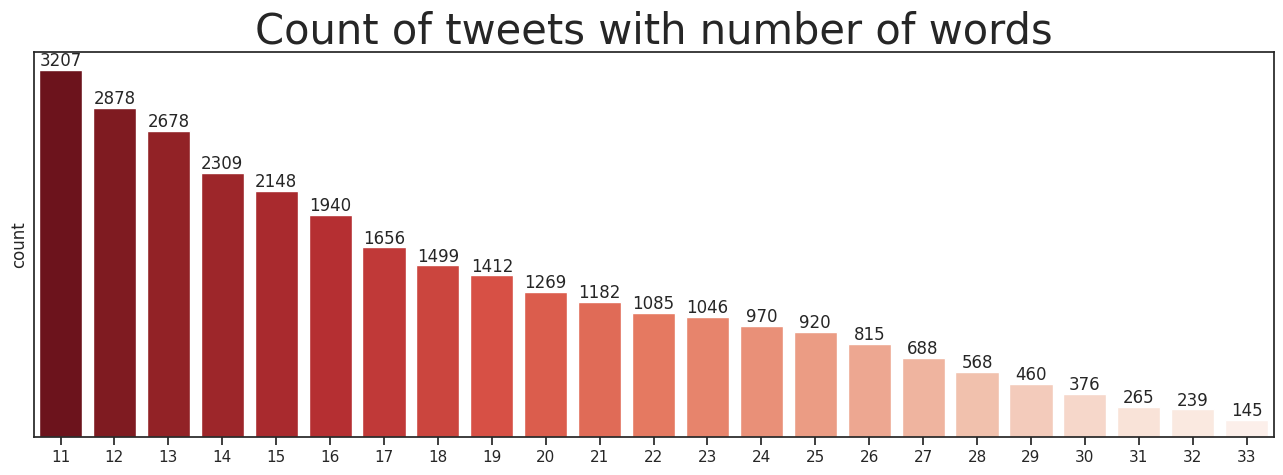

In [28]:
plt.figure(figsize=(16,5))
AX = sns.countplot(x='tweet_len', data=twitter[(twitter['tweet_len']<=1000) & (twitter['tweet_len']>10)], palette="Reds_r")
plt.title('Count of tweets with number of words', fontsize=30)
plt.yticks([])
AX.bar_label(AX.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

In [29]:
# Split your data into training and validation sets
x_train, x_test, y_train, y_test = train_test_split(twitter['cleaned_tweets'], twitter['Review'], train_size=0.85, random_state=42)

In [30]:
len(x_train) ,len(x_test)

(51290, 9052)

In [31]:
# Extracting features
vector = TfidfVectorizer()
vector.fit(x_train)

# Get the feature names
Feature_Names = vector.get_feature_names_out()

print("Number of feature words: ", len(Feature_Names))

Number of feature words:  22361


In [32]:
# Converting text data to lowercase before vectorization
x_train = [text.lower() for text in x_train]

# Creating vectorsizer
vector = TfidfVectorizer()

# Transforming lowercase text data
x_train = vector.fit_transform(x_train)

# Transforming testing data in same manner
x_test = [text.lower() for text in x_test]
x_test = vector.transform(x_test)

In [33]:
# Encoding data
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [34]:
# LSTM - Long Short-term Memory Networks
Max_Length = np.max(twitter['tweet_len'])
Max_Length

33

In [35]:
def lstm_prep(column , seq_len) :
    # create a vocab of words
    corpus = [word for text in column for word in text.split()]
    words_count = Counter(corpus)
    sorted_words = words_count.most_common()
    vocab_to_int = {w:i+1 for i , (w,c) in enumerate(sorted_words)}

    text_int = []

    for text in column :
        token = [vocab_to_int[word] for word in text.split()]
        text_int.append(token)


    # padding
    features = np.zeros((len(text_int) , seq_len) , dtype = int)
    for idx , y in tqdm(enumerate(text_int)) :
        if len(y) <= seq_len :
            zeros = list(np.zeros(seq_len - len(y)))
            new = zeros + y

        else :
            new = y[:seq_len]

        features[idx,:] = np.array(new)

    return sorted_words, features

In [36]:
VOCAB , tokenized_column = lstm_prep(twitter['cleaned_tweets'] , Max_Length)

0it [00:00, ?it/s]

In [37]:
VOCAB[:10]

[('game', 9398),
 ('johnson', 6619),
 ('like', 4491),
 ('get', 3983),
 ('facebook', 3846),
 ('xbox', 3756),
 ('google', 3756),
 ('microsoft', 3744),
 ('verizon', 3697),
 ('amazon', 3695)]

In [38]:
len(VOCAB)

23350

In [39]:
tokenized_column.shape

(60342, 33)

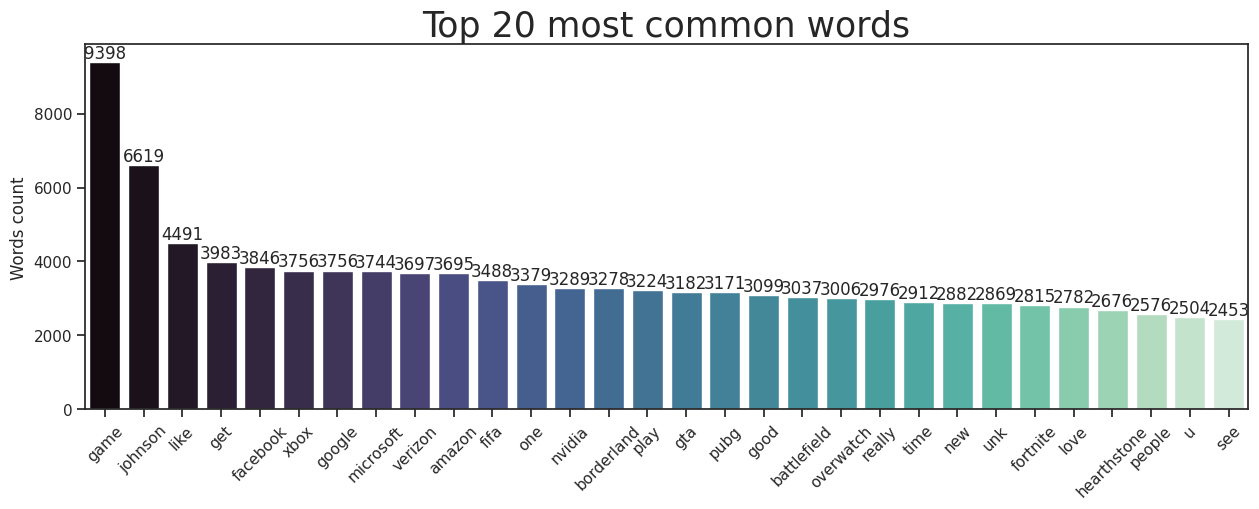

In [40]:
def most_common_words(vocab):
    keys = []
    values = []

    # Unpack the keys and values from the vocab list of tuples
    for key, value in vocab[:30]:
        keys.append(key)
        values.append(value)

    plt.figure(figsize=(15, 5))
    ax = sns.barplot(x=keys, y=values, palette='mako')
    plt.title('Top 20 most common words', size=25)
    ax.bar_label(ax.containers[0])
    plt.ylabel("Words count")
    plt.xticks(rotation=45)
    plt.subplots_adjust(bottom=0.15)
    plt.show()

most_common_words(VOCAB)

In [41]:
X = tokenized_column
y = lb.fit_transform(twitter['Review'].values)

In [42]:
X_train , X_test , Y_train , Y_test = train_test_split(X , y , train_size=0.85 , random_state=42)

In [43]:
train_data = TensorDataset(torch.from_numpy(X_train), torch.LongTensor(Y_train))
test_data = TensorDataset(torch.from_numpy(X_test), torch.LongTensor(Y_test))

In [44]:
BATCH_SIZE = 64

In [45]:
torch.manual_seed(42)
train_dataloader = DataLoader(
    dataset = train_data ,
    batch_size=BATCH_SIZE ,
    shuffle=True
)

In [46]:
torch.manual_seed(42)
val_dataloader = DataLoader(
    dataset = test_data ,
    batch_size = BATCH_SIZE ,
    shuffle=False
)

In [47]:
print(f"The size of the train dataloader {len(train_dataloader)} batches of {BATCH_SIZE}.")

The size of the train dataloader 802 batches of 64.


In [48]:
print(f"The size of the test dataloader {len(val_dataloader)} batches of {BATCH_SIZE}")

The size of the test dataloader 142 batches of 64


In [49]:
EMBEDDING_DIM = 200

In [50]:
Word2vec_train_data = list(map(lambda x: x.split(), twitter['cleaned_tweets']))

In [51]:
word2vec_model = Word2Vec(Word2vec_train_data, vector_size=EMBEDDING_DIM)

In [52]:
def weight_matrix(model,vocab):
    vocab_size= len(vocab)+1
    embedding_matrix = np.zeros((vocab_size,EMBEDDING_DIM))
    for word, token in vocab:
        if model.wv.__contains__(word):
            embedding_matrix[token]=model.wv.__getitem__(word)
    return embedding_matrix

In [53]:
embedding_vec = weight_matrix(word2vec_model,VOCAB)
print("Embedding Matrix Shape:", embedding_vec.shape)

Embedding Matrix Shape: (23351, 200)


In [54]:
def param_count(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    print('The Total number of parameters in the model : ', sum(params))

In [55]:
class LSTM(nn.Module):
    def __init__(self, vocab_size, embedding_dim, num_layers, hidden_dim, out_channels, bidirectional):
        super().__init__()

        self.no_layers = num_layers
        self.hidden_dim = hidden_dim
        self.out_channels = out_channels
        self.num_directions = 2 if bidirectional else 1
        self.embedding = nn.Embedding(vocab_size, embedding_dim)

        self.lstm = nn.LSTM(
            embedding_dim,
            hidden_dim,
            num_layers,
            dropout=0.5,
            bidirectional=bidirectional,
            batch_first=True
        )
        self.fc = nn.Linear(hidden_dim * self.num_directions, out_channels)

    def forward(self, x):
        h0 = torch.zeros((self.no_layers * self.num_directions, x.size(0), self.hidden_dim))
        c0 = torch.zeros((self.no_layers * self.num_directions, x.size(0), self.hidden_dim))
        embedded = self.embedding(x)
        out, _ = self.lstm(embedded, (h0, c0))
        out = out[:, -1, :]
        out = self.fc(out)
        return out

In [56]:
# Define Parameters
VOCAB_SIZE = len(VOCAB) + 1
NUM_LAYERS = 2
OUT_CHANNELS = 4
HIDDEN_DIM = 256
BIDIRECTIONAL = True

model = LSTM(VOCAB_SIZE , EMBEDDING_DIM , NUM_LAYERS , HIDDEN_DIM , OUT_CHANNELS , BIDIRECTIONAL)
model.embedding.weight.data.copy_(torch.from_numpy(embedding_vec))
model.embedding.weight.requires_grad = True

In [57]:
param_count(model)

The Total number of parameters in the model :  7187196


In [58]:
criterion=nn.CrossEntropyLoss()
optimizer=Adam(model.parameters(),lr=0.001)

In [59]:
epochs = 10
training_loss = []
training_acc = []
for i in tqdm(range(epochs)) :
    epoch_loss = 0
    epoch_acc = 0
    for batch , (x_train , y_train) in enumerate(train_dataloader) :
        y_pred = model(x_train)

        loss = criterion(y_pred , y_train)

        if batch % 500 == 0:
            print(f"Looked at {batch * len(x_train)}/{len(train_dataloader.dataset)} samples.")

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        epoch_loss +=loss
        epoch_acc += accuracy_score(y_train , y_pred.argmax(dim=1))

    training_loss.append((epoch_loss/len(train_dataloader)).detach().numpy())
    training_acc.append(epoch_acc/len(train_dataloader))

    print(f"Epoch {i+1}: Accuracy: {(epoch_acc/len(train_dataloader)) * 100}, Loss: {(epoch_loss/len(train_dataloader))}\n\n")

  0%|          | 0/10 [00:00<?, ?it/s]

Looked at 0/51290 samples.
Looked at 32000/51290 samples.
Epoch 1: Accuracy: 60.95368549779398, Loss: 0.9466459155082703


Looked at 0/51290 samples.
Looked at 32000/51290 samples.
Epoch 2: Accuracy: 83.84042897563782, Loss: 0.45263946056365967


Looked at 0/51290 samples.
Looked at 32000/51290 samples.
Epoch 3: Accuracy: 89.9813267312488, Loss: 0.2840852737426758


Looked at 0/51290 samples.
Looked at 32000/51290 samples.
Epoch 4: Accuracy: 92.75639027431421, Loss: 0.20402313768863678


Looked at 0/51290 samples.
Looked at 32000/51290 samples.
Epoch 5: Accuracy: 94.23616439670054, Loss: 0.1600046455860138


Looked at 0/51290 samples.
Looked at 32000/51290 samples.
Epoch 6: Accuracy: 95.26379364089776, Loss: 0.13205388188362122


Looked at 0/51290 samples.
Looked at 32000/51290 samples.
Epoch 7: Accuracy: 95.88348839439863, Loss: 0.11330032348632812


Looked at 0/51290 samples.
Looked at 32000/51290 samples.
Epoch 8: Accuracy: 96.50677992518703, Loss: 0.0971619188785553


Looked at 0/5

In [60]:
print(f"The loss of the training set is : {training_loss[-1]:0.2f}")
print(f"The accuracy of the training set is : {(training_acc[-1]*100):0.2f}%")

The loss of the training set is : 0.07
The accuracy of the training set is : 97.32%


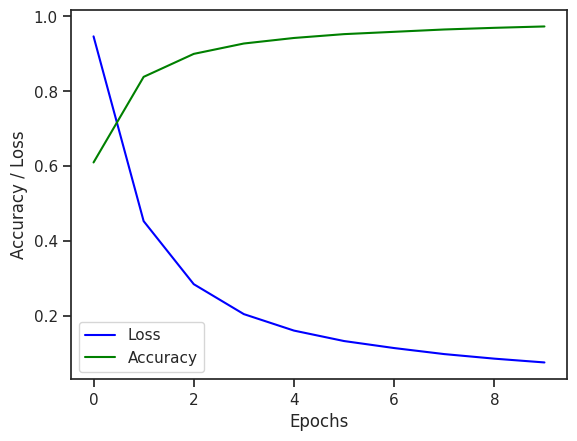

In [61]:
plt.plot(range(epochs),training_loss,color="blue",label="Loss")
plt.plot(range(epochs),training_acc,color="green",label="Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.legend()
plt.show()

In [62]:
val_loss=0
val_acc= 0
lstm_preds=[]
val_targets = []
torch.manual_seed(42)
with torch.no_grad() :
        for x_val , y_val in tqdm(val_dataloader) :
            y_pred=model.forward(x_val)
            val_pred = torch.softmax(y_pred , dim=1 ).argmax(dim=1)
            lstm_preds.append(val_pred)
            val_targets.extend(y_val)
            loss=criterion(y_pred,y_val)
            val_loss+=loss
            val_acc += accuracy_score(y_val , y_pred.argmax(dim=1))

val_loss/=len(val_dataloader)
val_acc/=len(val_dataloader)
lstm_preds = torch.cat(lstm_preds)
val_targets = torch.Tensor(val_targets)

  0%|          | 0/142 [00:00<?, ?it/s]

In [63]:
train_acc = training_acc[-1]
val_precision = precision_score(val_targets,lstm_preds,average='weighted')
val_recall = recall_score(val_targets,lstm_preds,average='weighted')
val_f1score = f1_score(val_targets,lstm_preds,average='weighted')

In [64]:
print(f"The training accuracy for LSTM : {(train_acc*100):0.2f}%\n")
print(f"The validation accuracy for LSTM : {(val_acc*100):0.2f}%\n")
print(f"The precision for LSTM : {val_precision:0.2f}\n")
print(f"The recall for LSTM : {val_recall:0.2f}\n")
print(f"The f1 score for LSTM : {val_f1score:0.2f}\n")
print(f"The training loss for LSTM : {training_loss[-1]:0.2f}\n")
print(f"The validation loss for LSTM : {val_loss:0.2f}\n")

The training accuracy for LSTM : 97.32%

The validation accuracy for LSTM : 86.17%

The precision for LSTM : 0.86

The recall for LSTM : 0.86

The f1 score for LSTM : 0.86

The training loss for LSTM : 0.07

The validation loss for LSTM : 0.65



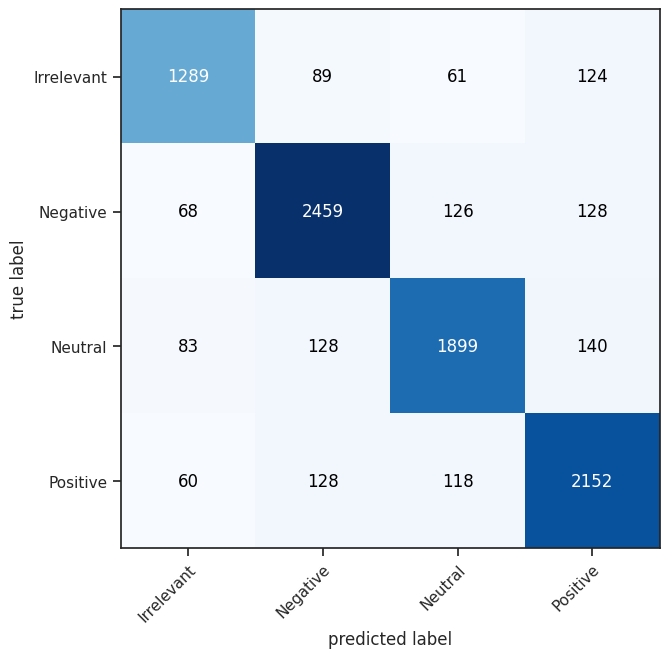

In [69]:
confmat = ConfusionMatrix(num_classes=4, task='multiclass')
confmat_tensor = confmat(preds=lstm_preds,
                         target=val_targets)

fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=twitter_review.keys(),
    figsize=(10, 7)
)

In [70]:
# Making Predictions
test_twitter = pd.read_csv('/content/drive/MyDrive/Prodigy Infotech Data Science Internship/Task-4/twitter_validation.csv')

In [71]:
test_twitter.columns

Index(['3364', 'Facebook', 'Irrelevant',
       'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣'],
      dtype='object')

In [72]:
test_twitter = test_twitter.drop('3364' , axis=1)

In [73]:
test_twitter = test_twitter.rename(columns={"Facebook":"Feature2","I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣":"Feature1","Irrelevant": "labels"})


In [74]:
test_twitter["tweets"]= test_twitter["Feature1"].astype(str) +" "+ test_twitter["Feature2"].astype(str)
test_twiter = test_twitter.drop(["Feature1","Feature2"],axis=1)

In [75]:
test_twitter.head()

,Feature2,labels,Feature1,tweets
0,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,@Microsoft Why do I pay for WORD when it funct...
2,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...","CSGO matchmaking is so full of closet hacking,..."
3,Google,Neutral,Now the President is slapping Americans in the...,Now the President is slapping Americans in the...
4,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [76]:
# Define the twitter_Review dictionary
twitter_Review = {
    'Positive': 0,
    'Neutral': 1,
    'Negative': 2
}

In [77]:
def getlabel(n):
    for label, code in twitter_Review.items():
        if code == n:
            return label

In [78]:
label = getlabel(1)

In [83]:
def make_predictions(row):
    random_data = row.sample(n=10)
    random_tweets = random_data['tweets'].values

    cleaned_tweets = []
    for tweet in random_tweets:
        cleaned_tweets.append(DataPrep(tweet))

    x_test = vector.transform(cleaned_tweets).toarray()
    y_test = random_data['labels'].values

    _, X_test = lstm_prep(cleaned_tweets, Max_Length)
    X_test = torch.from_numpy(X_test)


    lstm_pred = model(X_test)
    lstm_pred = torch.softmax(lstm_pred, dim=1).argmax(dim=1)

    for i in tqdm(range(10)):
        print(f"The original tweet: {random_tweets[i]}\n")
        print(f"The original label: {y_test[i]}\n")
        print(f"The lstm prediction is: {getlabel(lstm_pred[i])}\n")
        print('-' * 120)

# Call the function with your data
make_predictions(test_twitter)

0it [00:00, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

The original tweet: Nvidia GeForce Now: Google Stadia rival suffers another blow news89.net/nvidia-geforce… https://t.co/9ijNjV7L4C Nvidia

The original label: Neutral

The lstm prediction is: Neutral

------------------------------------------------------------------------------------------------------------------------
The original tweet: You literally have fanboys all over the games industry who just can't wait to take cheap shots at Microsoft & xbox. Online services and features, digital stores and the cloud are where things are headed. Google and Amazon have tremendous reach. To ignore the threat is dumb. Amazon

The original label: Positive

The lstm prediction is: None

------------------------------------------------------------------------------------------------------------------------
The original tweet: So yesterday, I decided to go back to Overwatch... and I forgot just how much I loved playing it. Now all I want to do is play it and do nothing else >.< I mean, the event i